### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np  
import pandas as pd 

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

### Step 2:

**Data Uploading using Pandas Function**

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/chandanc5525/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
64,266.0,114.0,0.0,228.0,0.0,932.0,670.0,180,48.70
73,425.0,106.3,0.0,151.4,18.6,936.0,803.7,3,36.30
852,298.0,0.0,107.0,186.0,6.0,879.0,815.0,28,42.64
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
463,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,100,56.06
...,...,...,...,...,...,...,...,...,...
812,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90,34.68
842,151.0,0.0,184.0,167.0,12.0,991.0,772.0,28,15.57
34,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,53.69
971,312.7,144.7,0.0,127.3,8.0,999.7,822.2,28,44.52


### Step 3:

**Doing Exploratory Data Analysis [EDA] :--> **

1. Univariate Analysis 

2. Bi Variate Analysis

In [4]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing Values': df[i].isnull().sum(),
        'Unique Values': df[i].nunique(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Mode': df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Mode', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Min,Max,Mean,Median,Mode,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,102.000000,540.000000,281.167864,272.900000,362.600000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,359.400000,73.895825,22.000000,0.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,200.100000,54.188350,0.000000,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,121.800000,247.000000,181.567282,185.000000,192.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,32.200000,6.204660,6.400000,0.000000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,801.000000,1145.000000,972.918932,968.000000,932.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,992.600000,773.580485,779.500000,594.000000,80.175980,-0.102177,93.050000
7,age,int64,0,14,1.000000,365.000000,45.662136,28.000000,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,2.330000,82.600000,35.817961,34.445000,33.400000,16.705742,-0.313725,22.425000


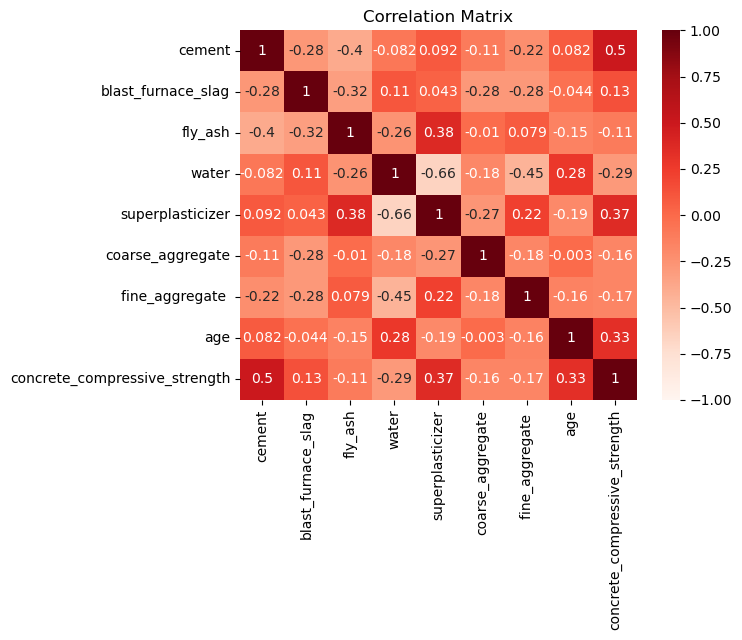

In [14]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap = 'Reds')
plt.title('Correlation Matrix')
plt.show()